# Univariate Selection

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [71]:
data = pd.read_csv('D:/Data Science/Project/pmf.csv')

In [72]:
data.head()

,AREA,RAINFALL,AVG_TEMPERATURE,HUMIDITY,GROUND_WATERLEVEL,PRODUCTION
0,66576,197.10,28.7,72.0,4.025,166048
1,80520,166.00,26.4,74.3,5.860,103729
2,46302,137.04,28.0,73.0,5.670,71087
3,48689,179.24,29.4,71.0,6.100,106829
4,100110,107.94,27.9,69.6,8.330,124843


In [73]:
y = data.iloc[0:15,-1]
X = data.iloc[0:15,0:5]

In [74]:
# apply SelectKBest top 10 features
best_features = SelectKBest(score_func=chi2, k =5 )

In [75]:
fit = best_features.fit(X, y)

In [76]:
fit.scores_

array([4.57837513e+05, 1.42918011e+02, 8.67311880e-01, 1.21608198e+00,
       1.54242462e+01])

In [77]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [78]:

= pd.concat([dfcolumns, dfscores], axis= 1)

SyntaxError: invalid syntax (<ipython-input-78-e8495c0fe0cf>, line 1)

In [79]:
featureScores.columns = ['Features', 'Score']
print(featureScores)

            Features          Score
0               AREA  457837.512564
1           RAINFALL     142.918011
2    AVG_TEMPERATURE       0.867312
3           HUMIDITY       1.216082
4  GROUND_WATERLEVEL      15.424246


In [80]:
ten_features = featureScores.sort_values(by='Score', ascending= False).head(10)['Features'].values

In [81]:
print(ten_features)

['AREA' 'RAINFALL' 'GROUND_WATERLEVEL' 'HUMIDITY' 'AVG_TEMPERATURE']


# Feature Importance

In [82]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [83]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [84]:
model.feature_importances_

array([0.20788764, 0.20624526, 0.19335012, 0.2078314 , 0.18468558])

In [85]:
featureImportance =  pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

In [86]:
featureImportance = featureImportance.sort_values(by="Importance", ascending= False)

In [87]:
featureImportance

,Importance
AREA,0.207888
HUMIDITY,0.207831
RAINFALL,0.206245
AVG_TEMPERATURE,0.193350
GROUND_WATERLEVEL,0.184686


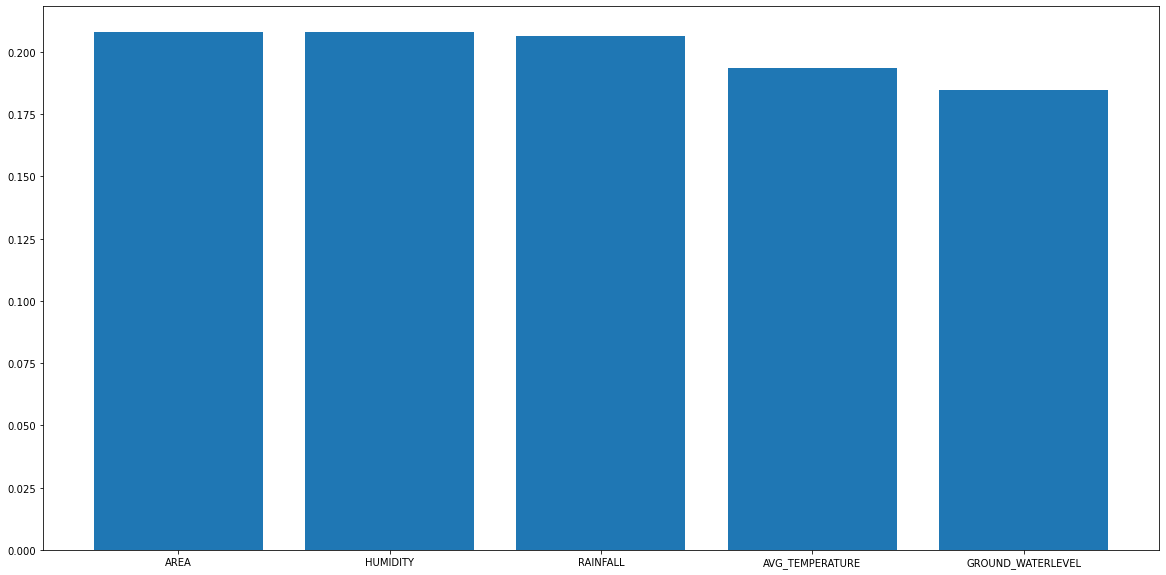

In [88]:
plt.figure(figsize=(20,10))
plt.bar(featureImportance.index, featureImportance['Importance'])
plt.show()

# Correlation Matix

In [89]:
import seaborn as sns

In [90]:
data_corr = data.corr()

In [91]:
data_corr

,AREA,RAINFALL,AVG_TEMPERATURE,HUMIDITY,GROUND_WATERLEVEL,PRODUCTION
AREA,1.000000,0.190990,0.147645,0.170493,-0.143155,0.953746
RAINFALL,0.190990,1.000000,0.828912,0.875114,-0.153803,0.132751
AVG_TEMPERATURE,0.147645,0.828912,1.000000,0.723408,-0.146155,0.082748
HUMIDITY,0.170493,0.875114,0.723408,1.000000,-0.093422,0.096442
GROUND_WATERLEVEL,-0.143155,-0.153803,-0.146155,-0.093422,1.000000,-0.169040
PRODUCTION,0.953746,0.132751,0.082748,0.096442,-0.169040,1.000000


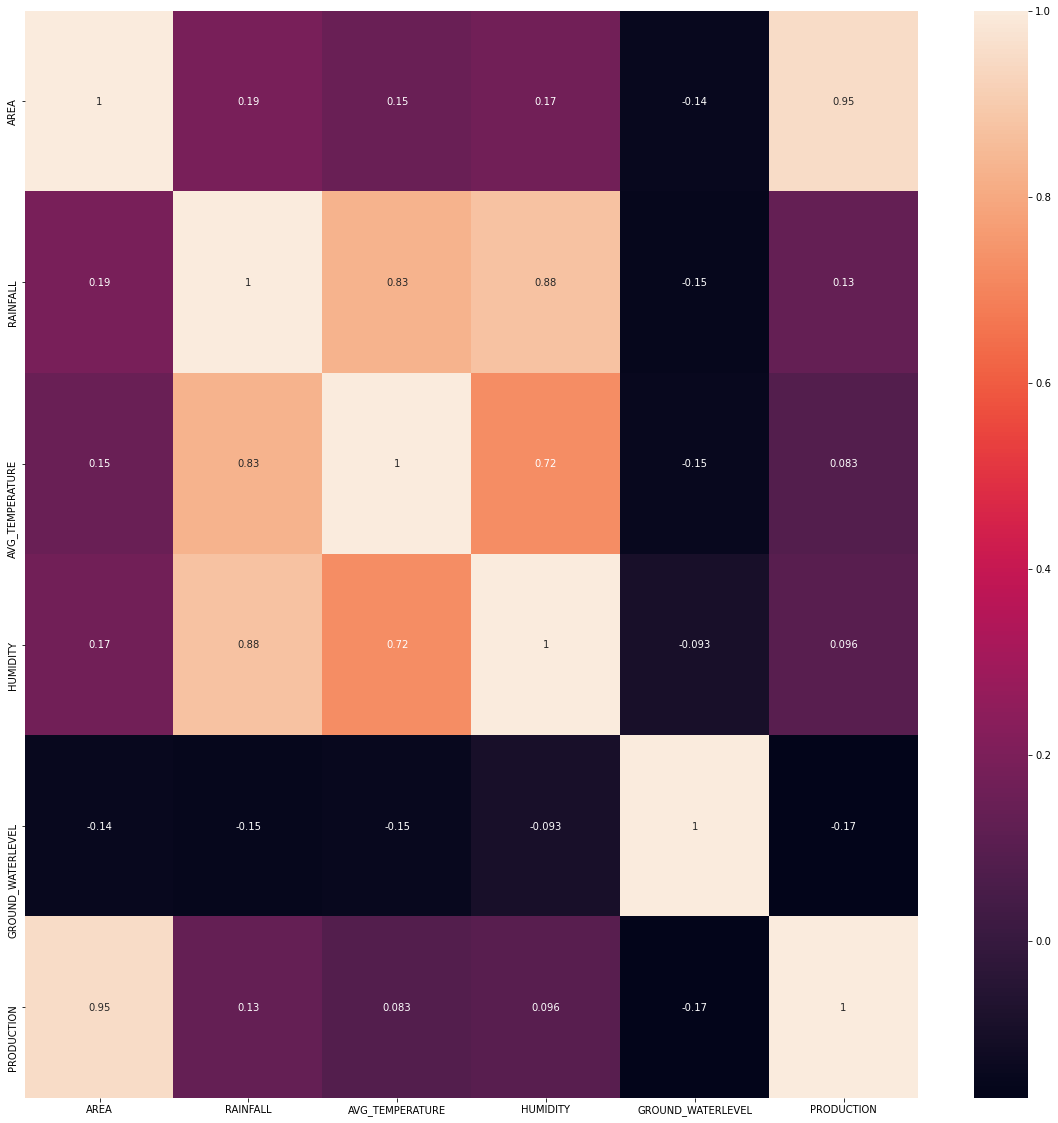

In [92]:
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, annot=True)
plt.show()